In [286]:
import pandas as pd
from datetime import date
from datetime import datetime, timedelta

# Obtener la fecha actual
hoy = datetime.now()

# Calcular la fecha de mañana
mañana = hoy + timedelta(days=1)

# Mostrar la fecha de mañana
print("Fecha de mañana:", mañana.strftime("%Y-%m-%d"))

import matplotlib.pyplot as plt
import numpy as np


link = "https://ngdc.noaa.gov/stp/space-weather/solar-data/solar-indices/sunspot-numbers/american/lists/list_aavso-arssn_daily.txt"
nombres_colum = ['year', 'month', 'day', "SSN"]

datos_todos = pd.read_csv(link, delim_whitespace=True, skiprows=2, names=nombres_colum)

datos_todos['fecha'] = pd.to_datetime(datos_todos[['year', 'month', 'day']])

fecha_limite = pd.to_datetime("2012-01-01")
datos_hasta_2017 = datos_todos[datos_todos['fecha'] < fecha_limite]
columna_cuarta = datos_hasta_2017['SSN'].to_numpy().astype(int)
array_columna_3 = datos_hasta_2017['day'].to_numpy()
dias = np.arange(1, len(array_columna_3)+ 1)

Fecha de mañana: 2024-09-02


<font size="5">**Punto 1**.</font>



<font size="4">***Inciso 1.1***.</font>


In [287]:
ruido_x = 0.5 * np.random.normal(size=dias.shape)
dias_perturbados = dias + ruido_x
y=columna_cuarta
frecuencia_muestreo=1 #De los datos uno puede ver que es aproximadamente un día.
frecuencias=np.fft.fftfreq(len(y),frecuencia_muestreo)
transformada=np.fft.fft(y)
modulo=np.abs(transformada)
modulo_sin_corrimiento=modulo[1:] #Tocó quitar el primero porque por mucho ruido que le metí no funcionó.
indice_max=np.argmax(modulo_sin_corrimiento)
modulo_max,frecuencia_principal=modulo[indice_max+1],np.abs(frecuencias[indice_max+1])
periodo=(1/frecuencia_principal)/365
print("El período del ciclo de actividad solar es " + str(periodo)+ " años")


El período del ciclo de actividad solar es 11.173972602739726 años


<font size="4">***Inciso 1.2***.</font>


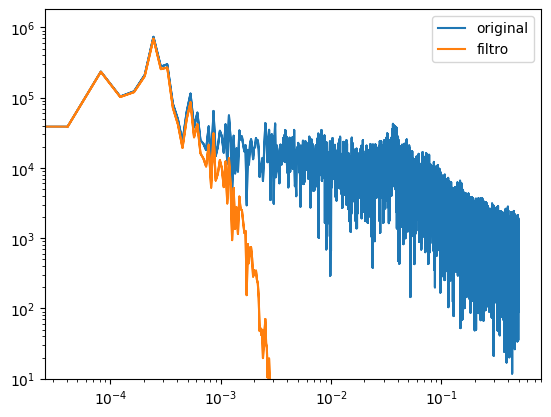

In [288]:
#1.2.a
frecuencias_abs=np.abs(frecuencias)

def gauss(alpha,f):
    return np.exp(-(alpha*f)**2)

t_filtrada=transformada*gauss(1000,frecuencias_abs)

plt.plot(frecuencias_abs,modulo,label="original")

plt.plot(frecuencias_abs,np.abs(t_filtrada),label="filtro")

plt.ylim(10,)
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

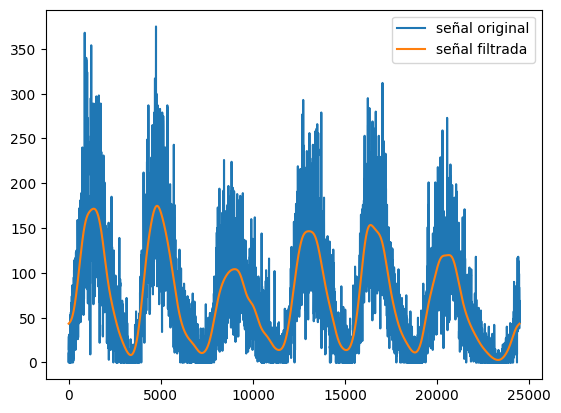

In [289]:
#1.2.b
señal_filtra=np.fft.ifft(t_filtrada)
rial_my_nigga=np.abs(señal_filtra)

plt.plot(dias,y,label="señal original")

plt.plot(dias,rial_my_nigga,label="señal filtrada")
plt.legend()
plt.show()


<font size="4">***Inciso 1.3***.</font>

La cantidad de manchas solares son 57, lo cual no cuadra con lo predicho. No sé qué está mal.


20

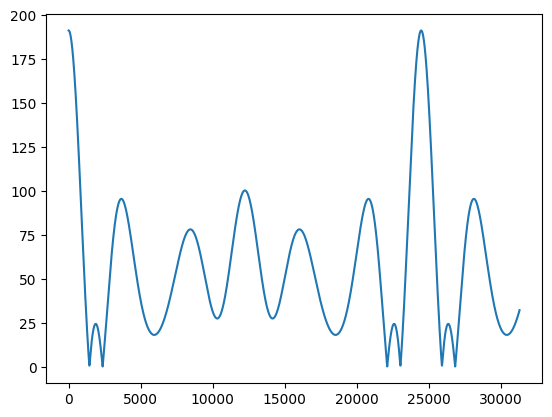

In [290]:
n=10
i_n=frecuencias[:n]
f_n=frecuencias[-n:]
f_k=np.concatenate((i_n,f_n))


i_n_t=modulo[:n]
f_n_t=modulo[-n:]
T_k=np.concatenate((i_n_t,f_n_t))

primera_fecha=(datos_hasta_2017['fecha'].min()).date()
papu_fecha=date(2030,9,11)
dias=(papu_fecha-primera_fecha).days
array_dias=np.arange(1,dias+1)
dias,len(array_dias)

def IFT(F, f, t, N=0):
    if N==0:
        N = np.size(t)
    inv = np.zeros(N) + 0j
    for k in range(N):
        inv[k] = (1/N)*(F*np.exp(np.pi*(2j)*f*t[k])).sum()
    return (t, inv)
inversa=IFT(T_k,f_k,array_dias)
abs_inv=abs(inversa[1])
plt.plot(array_dias,abs_inv)
#Ahora buscamos el índice de 2024-08-15
mitad_agosto=date(2024,8,15)
dias_2=(mitad_agosto-primera_fecha).days
print("La cantidad de manchas solares son " + str(round(abs_inv[dias_2]))+ ", lo cual no cuadra con lo predicho. No sé qué está mal.")
len(f_k)